# Signal Decomposition Using EVD of Hankel Matrices

---

Suppose we are given a data signal which consists of several nearly mono-components.

_Can we recover the mono-components?_

The answer is YES, with an efficient algorithm using EVDs of Hankel matrices. 

Mono-component recovery can be successfully applied to audio signals.

## Prerequisites

The reader should be familiar to elementary concepts about signals, and with linear algebra concepts, particularly EVD and its properties and algorithms.
 
## Competences 

The reader should be able to decompose given signal into mono-components using EVD methods.

## References

For more details see [P. Jain and R. B. Pachori, An iterative approach for decomposition of multi-component non-stationary signals based on eigenvalue decomposition of the Hankel matrix][JP15].

__Credits__: The first Julia implementation was derived in [A. M. Bačak, Master's Thesis][AMB15].

[AMB15]: #1 "Ana Marija Bačak, 'Decomposition of Audio Signal using Eigenvalues and Eigenvectors of Hankel Matrix', Master's Thesis, University of Split, FESB, 2015 (in Croatian)."

[JP15]: http://www.sciencedirect.com/science/article/pii/S0016003215002288 "Pooja Jain and Ram Bilas Pachori, 'An iterative approach for decomposition of multi-component non-stationary signals based on eigenvalue decomposition of the Hankel matrix', Journal of the Franklin Institute, 352 (2015) 4017–4044."

## Extraction  of stationary mono-components

### Definitions

Let $x\in\mathbb{R}^{m}$, denote a __signal__ with $N$ samples.

Assume $x$ is composed of $L$ __stationary mono-components__, $x=\sum\limits_{k=1}^L x^{(k)}$, where
$x^{(k)}_i=A_k \cos(2\pi f_k i +\theta_k)$ for $i=1,2,\ldots,m$.
Here $f_k=\displaystyle\frac{F_k}{F}$ is the __normalized frequency__ of $x^{(k)}$,
$F$ is the __sampling frequency__ of $x$ in Hz, $F_k$ is the sampling frequency of $x^{(k)}$, 
$A_k$ is the __amplitude__ of $x^{(k)}$, and $\theta_k$ is the __phase__ of $x^{(k)}$.
We assume that $F_k< F_{k+1}$ for $k=1,2,\ldots,n-1$, and $F>2F_n$.

A __Hankel matrix__ is a (real) square matrix with constant values along the skew-diagonals. More precisely, let $a\in\mathbb{R}^{2n-1}$. An $n\times n$ matrix $H\equiv H(a)$ for which 
$H_{ij}=A_{i+1,j-1}=a_{i+j-1}$ is a Hankel matrix.

### Facts

Let $x$ be a signal with $2n-1$ samples composed of $L$ stationary mono-components.

Let $H$ be an $n\times n$ Hankel matrix corresponding to $x$ and let 
$H=U\Lambda U^T$ be its EVD (Hankel matrix is symmetric) with 
$\lambda_1\leq \lambda_2 \leq \cdots \leq \lambda_n$.

Smilarly, let $H_k$ be the $n\times n$ Hankel matrix corresponding to the $k$-th component 
$x^{(k)}$ and let $H_k=U_k\Lambda_k U_k^T$ be its EVD.

1. $H=\sum\limits_{k=1}^{L} H_k$.

2. $H_k=\lambda_k U_{:,k}U_{:,k}^T + \lambda_{n-k+1} U_{:,n-k+1}U_{:,n-k+1}^T$.

### Example - Signal with three mono-components

In [2]:
using Winston
using SpecialMatrices

In [3]:
# Small Hankel matrix
a=collect(1:11)
Hankel(a)

6×6 SpecialMatrices.Hankel{Int64}:
 1  2  3  4   5   6
 2  3  4  5   6   7
 3  4  5  6   7   8
 4  5  6  7   8   9
 5  6  7  8   9  10
 6  7  8  9  10  11

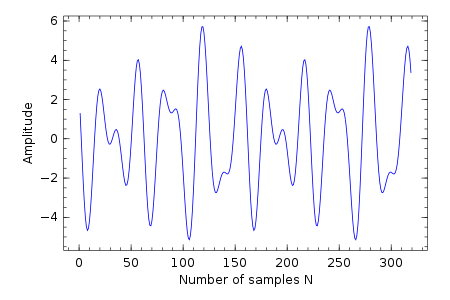

In [4]:
# Create the signal
n=160
N=2*n-1
F = 6400
L = 3
A = [3, 2, 1]
Fk= [200, 320, 160]
θ = [pi/2, pi/4, 0]
x = zeros(N)
for k=1:L
    for i=1:N
        x[i]+=A[k]*cos(2*pi*Fk[k]*i/F+θ[k])
    end
end
plot(x,"b",xlabel="Number of samples N", ylabel="Amplitude")

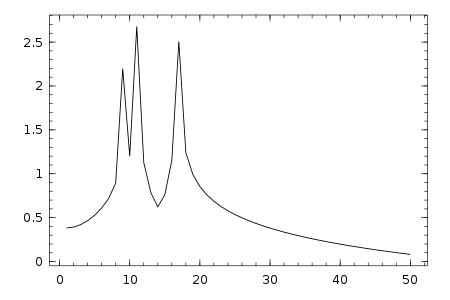

In [5]:
# FFT indicates that there are three components
y=fft(x)
plot(log10(abs(y[1:50])))

In [8]:
# Let us decompose the signal 
H=Hankel(x)

160×160 SpecialMatrices.Hankel{Float64}:
  1.3104     0.115875  -1.08857   …   4.07448    3.35497    2.41421 
  0.115875  -1.08857   -2.22028       3.35497    2.41421    1.3104  
 -1.08857   -2.22028   -3.20152       2.41421    1.3104     0.115875
 -2.22028   -3.20152   -3.96587       1.3104     0.115875  -1.08857 
 -3.20152   -3.96587   -4.46374       0.115875  -1.08857   -2.22028 
 -3.96587   -4.46374   -4.66636   …  -1.08857   -2.22028   -3.20152 
 -4.46374   -4.66636   -4.56793      -2.22028   -3.20152   -3.96587 
 -4.66636   -4.56793   -4.18585      -3.20152   -3.96587   -4.46374 
 -4.56793   -4.18585   -3.55882      -3.96587   -4.46374   -4.66636 
 -4.18585   -3.55882   -2.74321      -4.46374   -4.66636   -4.56793 
 -3.55882   -2.74321   -1.80783   …  -4.66636   -4.56793   -4.18585 
 -2.74321   -1.80783   -0.827855     -4.56793   -4.18585   -3.55882 
 -1.80783   -0.827855   0.121836     -4.18585   -3.55882   -2.74321 
  ⋮                               ⋱                           

In [9]:
λ,U=eig(full(H))
λ

160-element Array{Float64,1}:
 -240.0        
 -160.0        
  -80.0        
   -6.16457e-13
   -4.39926e-14
   -4.29379e-14
   -3.20429e-14
   -2.73661e-14
   -2.47427e-14
   -2.45914e-14
   -2.36681e-14
   -2.22072e-14
   -2.16047e-14
    ⋮          
    2.00395e-14
    2.18714e-14
    2.29849e-14
    2.32129e-14
    2.50189e-14
    2.80344e-14
    3.08087e-14
    3.0899e-14 
    5.36341e-14
   80.0        
  160.0        
  240.0        

We see that the three smallest and the three largest eigenvalues come in pairs and define the three mono-components. 

The ratios of the moduli of the eigenvalues correspond to the ratios of the amplitudes of the mono-components. 

In [10]:
# Form the three matrices
Hcomp=Array(Any,3)
for k=1:L
    Hcomp[k]=λ[k]*U[:,k]*U[:,k]' + λ[end-k+1]*U[:,end-k+1]*U[:,end-k+1]'
end

In [11]:
# Compare the first matrix with the Hankel matrix of the first mono-component
x1 = zeros(N)
l=1
for i=1:N
    x1[i]+=A[l]*cos(2*pi*Fk[l]*i/F+θ[l])
end

In [12]:
H1=Hankel(x1)
eigvals(full(H1)), norm(Hcomp[1]-H1)

([-240.0,-1.85479e-13,-1.77059e-13,-1.69081e-13,-1.67474e-13,-1.59156e-13,-1.41293e-13,-1.35445e-13,-1.19274e-13,-1.14298e-13  …  1.13079e-13,1.16128e-13,1.25883e-13,1.37737e-13,1.58184e-13,1.63801e-13,1.68419e-13,1.80785e-13,1.86631e-13,240.0],1.3949886793064892e-12)

In [13]:
# Now we reconstruct the mono-components from the skew-diagonal elements of Hcomp
xcomp=Array(Array{Float64},L)
z=Array(Float64,N)
for k=1:L
    z[1:2:N]=diag(Hcomp[k])
    z[2:2:N]=diag(Hcomp[k],1)
    xcomp[k]=copy(z)
end

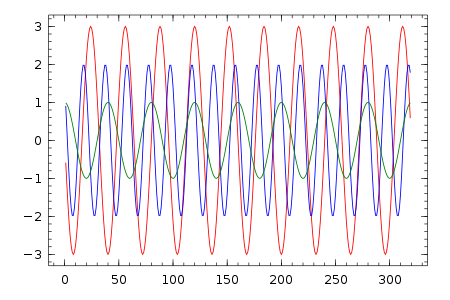

In [14]:
xaxis=collect(1:N)
plot(xaxis,xcomp[1],"r", xaxis,xcomp[2],"b", xaxis,xcomp[3],"g")

## Fast EVD of Hankel matrices

Several outer eigenvalues pairs of Hankel matrices can be computed using Lanczos method. 
If the multiplication $Hx$ is performed using Fast Fourier Transform, this EVD computation is very fast.

### Definitions

A __Toeplitz matrix__ is a (real) square matrix with constant values along the diagonals. 
More precisely, let $a=(a_{-(n-1)},a_{-(n-2)},\ldots,a_{-1},a_0,a_1,\ldots,a_{n-1})\in\mathbb{R}^{2n-1}$. An $n\times n$ matrix $T\equiv T(a)$ for which
$T_{ij}=T_{i+1,j+1}=a_{i-j}$ is a Toeplitz matrix.

A __circulant matrix__ is a Toeplitz matrix where each column is rotated one element downwards relative to preceeding column. More precisely, let $a\in\mathbb{R}^{n}$. An $n\times n$ matrix $C\equiv C(a)=T(a,a_{1:n-1})$ is a Circulant matrix.

A __rotation matrix__ is an identity matrix rotated 90 degrees to the right (or left).

A __Fourier matrix__ is Vandermonde matrix
$F_n=V(1,\omega_n,\omega_n^2,\ldots, \omega_n^{n-1})$, where 
$\omega_n=exp(2\pi i/n)$ is the $n$-th root of unity (see the 
[Eigenvalue Decomposition - Definitions and Facts](../Module B - Eigenvalue and Singular Value Decompositions/L3a Eigenvalue Decomposition - Definitions and Facts.ipynb) notebook).

### Example

Notice different meaning of vector $a$: in `C=Circulant(a)`, $a$ is the first column, in 
`T=Toeplitz(a)`, $a_i$ is the diagonal element of the $i$-th diagonal starting from $T_{1n}$, and in `H=Hankel(a)`, $a_i$ is the element of the $i$-th skew-diagonal starting from $H_{11}$.

In [15]:
C=Circulant([1,2,3,4,5])

5×5 SpecialMatrices.Circulant{Int64}:
 1  5  4  3  2
 2  1  5  4  3
 3  2  1  5  4
 4  3  2  1  5
 5  4  3  2  1

In [17]:
TC=Toeplitz([2,3,4,5,1,2,3,4,5])

5×5 SpecialMatrices.Toeplitz{Int64}:
 1  5  4  3  2
 2  1  5  4  3
 3  2  1  5  4
 4  3  2  1  5
 5  4  3  2  1

In [18]:
T=Toeplitz([1,2,3,4,5,6,7,8,9])

5×5 SpecialMatrices.Toeplitz{Int64}:
 5  4  3  2  1
 6  5  4  3  2
 7  6  5  4  3
 8  7  6  5  4
 9  8  7  6  5

In [19]:
H1=Hankel([1,2,3,4,5,6,7,8,9])

5×5 SpecialMatrices.Hankel{Int64}:
 1  2  3  4  5
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8
 5  6  7  8  9

### Facts 

For more details see [G. H. Golub and C. F. Van Loan, Matrix Computations, p. 202][GVL96],
and the references therein

[GVL96]: http://web.mit.edu/ehliu/Public/sclark/Golub%20G.H.,%20Van%20Loan%20C.F.-%20Matrix%20Computations.pdf "G. H. Golub and C. F. Van Loan, 'Matrix Computations', 3rd ed., The John Hopkins University Press, Baltimore, MD, 1996."

1. Hankel matrix is the product of a Toeplitz matrix and the rotation matrix.

2. Circulant matrix is normal and, thus, unitarily diagonalizable, with the eigenvalue decomposition
$$
C(a)=U\mathop{\mathrm{diag}}(F_n^* a)U^*,
$$
where $U=\displaystyle\frac{1}{\sqrt{n}} F_n$.
The product $F_n^* a$ can be computed by the _Fast Fourier Transform_(FFT).

3. Given $a,x\in\mathbb{R}^n$, the product $y=C(a)x$ can be computed using FFT as follows:
\begin{align*}
\tilde x&=F_n^*x\\
\tilde a&=F_n^*a\\
\tilde y&=\tilde x.* \tilde a\\
y&= F_n^{-*} \tilde y.
\end{align*}

4. Toeplitz matrix of order $n$ can be embedded in a circulant matrix of order $2n-1$: if
$a\in\mathbb{R}^{2n-1}$, then 
$$
T(a)=[C([a_{n+1:2n-1};a_{1:n}])]_{1:n,1:n}.
$$

5. Further, let $x\in\mathbb{R}^{n}$ and let $\bar x\in\mathbb{R}^{2n-1}$ be equal to $x$ padded with $n-1$ zeros.Then
$$
T(a)x=[C([a_{n+1:2n-1};a_{1:n}])\bar x]_{1:n}.
$$

6. Fact 1 implies $H(a)x=(T(a)J)x=T(a)(Jx)$.


### Examples

In [20]:
# Fact 1
J=rotl90(eye(Int64,5))
T*J

5×5 Array{Int64,2}:
 1  2  3  4  5
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8
 5  6  7  8  9

In [21]:
# Fact 1
full(T)*J

5×5 Array{Int64,2}:
 1  2  3  4  5
 2  3  4  5  6
 3  4  5  6  7
 4  5  6  7  8
 5  6  7  8  9

In [22]:
# Fact 2
a=rand(-8:8,6)
n=length(a)
C=Circulant(a)
ω=exp(2*pi*im/n)
v=map(Complex,[ω^k for k=0:n-1])
F=Vandermonde(v)
U=F/sqrt(n)
λ=full(F)'*a

6-element Array{Complex{Float64},1}:
          15.0+0.0im    
          -0.5-6.06218im
          -4.5+12.9904im
 -5.0-1.54321e-14im     
          -4.5-12.9904im
          -0.5+6.06218im

In [23]:
# Residual
norm(full(C)*U-U*diagm(λ))

3.9851599303175715e-14

In [24]:
?fft

search: fft fft! FFTW fftshift rfft ifft bfft ifft! bfft! ifftshift irfft brfft



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`. See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
      * Julia starts FFTW up with 1 thread by default. Higher performance is usually possible by increasing number of threads. Use `FFTW.set_num_threads(Sys.CPU_CORES)` to use as many threads as cores on your system.
      * This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons. For more details, refer to the ["Noteworthy Differences from other Languages"](:ref:`man-noteworthy-differences`) section of the manual.



In [25]:
# Check fft
norm(λ-fft(a))

3.9450428189558956e-14

Fact 3 - Circulant() x vector, as implemented in the package `SpecialMatrices.jl`

```
function *{T}(C::Circulant{T},x::Vector{T})
    xt=fft(x)
    vt=fft(C.c)
    yt=vt.*xt
    real(ifft(yt))
end
```

Similarly, `A_mul_B!()`

```
function A_mul_B!{T}(y::StridedVector{T},C::Circulant{T},x::StridedVector{T})
    xt=fft(x)
    vt=fft(C.c)
    yt=vt.*xt
    y=typeof(x[1])==Int ? map(Int,round(real(ifft(yt)))): ( (T <: Real) ? map(T,real(ifft(yt))) : ifft(yt))
    return y
end
```

In [26]:
x=rand(-9:9,n)

6-element Array{Int64,1}:
 -5
 -8
 -4
  7
  0
 -4

In [27]:
[full(C)*x C*x A_mul_B!(similar(x),C,x)]

6×3 Array{Int64,2}:
 -30  -30  -30
 -87  -87  -87
 -22  -22  -22
 -70  -70  -70
 -43  -43  -43
  42   42   42

In [28]:
# Fact 4 - Embedding Toeplitz() into Circulant()
n=5
a=rand(-6:6,2*n-1)
T=Toeplitz(a)

5×5 SpecialMatrices.Toeplitz{Int64}:
 -4   6   0  -2   6
 -5  -4   6   0  -2
 -1  -5  -4   6   0
 -6  -1  -5  -4   6
  5  -6  -1  -5  -4

In [29]:
C=Circulant([a[n:2*n-1];a[1:n-1]])

9×9 SpecialMatrices.Circulant{Int64}:
 -4   6   0  -2   6   5  -6  -1  -5
 -5  -4   6   0  -2   6   5  -6  -1
 -1  -5  -4   6   0  -2   6   5  -6
 -6  -1  -5  -4   6   0  -2   6   5
  5  -6  -1  -5  -4   6   0  -2   6
  6   5  -6  -1  -5  -4   6   0  -2
 -2   6   5  -6  -1  -5  -4   6   0
  0  -2   6   5  -6  -1  -5  -4   6
  6   0  -2   6   5  -6  -1  -5  -4

In [30]:
# Fact 5 - Toeplitz() x vector
x=rand(-6:6,n)

5-element Array{Int64,1}:
  4
 -1
  6
  6
  1

In [31]:
[full(T)*x T*x A_mul_B!(similar(x),T,x)]

5×3 Array{Int64,2}:
 -28  -28  -28
  18   18   18
  13   13   13
 -71  -71  -71
 -14  -14  -14

In [32]:
# Fact 6 - Hankel() x vector
H1=Hankel(a)

5×5 SpecialMatrices.Hankel{Int64}:
  6  -2   0   6  -4
 -2   0   6  -4  -5
  0   6  -4  -5  -1
  6  -4  -5  -1  -6
 -4  -5  -1  -6   5

In [33]:
[full(H1)*x H1*x A_mul_B!(similar(x),H1,x)]

5×3 Array{Int64,2}:
  58   58   58
  -1   -1   -1
 -61  -61  -61
 -14  -14  -14
 -48  -48  -48

### Example - Fast EVD of a Hankel matrix

Given a Hankel matrix $H$, the Lanczos method can be applied by defining a function (linear map) which returns the product $Hx$ for any vector $x$. This approach uses the package [LinearMaps.jl](https://github.com/Jutho/LinearMaps.jl) and is described in the 
[Symmetric Eigenvalue Decomposition - Lanczos Method](../Module B - Eigenvalue and Singular Value Decompositions/L4d Symmetric Eigenvalue Decomposition - Lanczos Method.ipynb) notebook. 

_The computation is very fast and allocates little extra space._

__IMPORTANT__ For package [SpecialMatrices.jl](https://github.com/jiahao/SpecialMatrices.jl)
to work with very large Hankel matrices, we need to modify the corresponding lines in the file `hankel.jl` to 
```
getindex(H::Hankel, i, j) = H.c[i+j-1]
isassigned(H::Hankel, i, j) = isassigned(H.c, i+j-1)
```

In [34]:
using LinearMaps

In [35]:
n=size(H,1)
f(x)=A_mul_B!(similar(x),H,x)

f (generic function with 1 method)

In [36]:
H

160×160 SpecialMatrices.Hankel{Float64}:
  1.3104     0.115875  -1.08857   …   4.07448    3.35497    2.41421 
  0.115875  -1.08857   -2.22028       3.35497    2.41421    1.3104  
 -1.08857   -2.22028   -3.20152       2.41421    1.3104     0.115875
 -2.22028   -3.20152   -3.96587       1.3104     0.115875  -1.08857 
 -3.20152   -3.96587   -4.46374       0.115875  -1.08857   -2.22028 
 -3.96587   -4.46374   -4.66636   …  -1.08857   -2.22028   -3.20152 
 -4.46374   -4.66636   -4.56793      -2.22028   -3.20152   -3.96587 
 -4.66636   -4.56793   -4.18585      -3.20152   -3.96587   -4.46374 
 -4.56793   -4.18585   -3.55882      -3.96587   -4.46374   -4.66636 
 -4.18585   -3.55882   -2.74321      -4.46374   -4.66636   -4.56793 
 -3.55882   -2.74321   -1.80783   …  -4.66636   -4.56793   -4.18585 
 -2.74321   -1.80783   -0.827855     -4.56793   -4.18585   -3.55882 
 -1.80783   -0.827855   0.121836     -4.18585   -3.55882   -2.74321 
  ⋮                               ⋱                           

In [37]:
A=LinearMap(f,n,issymmetric=true)

FunctionMap{Float64}(f, nothing, 160, 160; ismutating=false, issymmetric=true, ishermitian=true, isposdef=false)

In [38]:
size(A)

(160,160)

In [40]:
@time eigs(full(H));

  0.000920 seconds (370 allocations: 464.516 KB)


In [42]:
# Run twice
@time λA,UA=eigs(A, nev=6, which=:LM)

  0.007921 seconds (5.39 k allocations: 1.331 MB)


([-240.0,240.0,-160.0,160.0,-80.0,80.0],
[-0.0864252 0.0709273 … 0.00877199 0.111459; -0.0986018 0.0527038 … 0.0261 0.108714; … ; -0.0527038 0.0986018 … -0.0261 0.108714; -0.0709273 0.0864252 … -0.00877199 0.111459],

6,1,20,[-3.04882e-15,1.07173e-15,-1.97653e-15,-1.92057e-15,5.59926e-15,-2.61023e-15,-3.40219e-15,6.15799e-15,-2.03892e-15,-4.26767e-15  …  5.69226e-15,-5.81944e-15,-1.23304e-14,2.43805e-14,4.08635e-15,1.07825e-14,-1.86825e-14,5.06337e-16,-1.2319e-14,1.57534e-14])

## Extraction of non-stationary mono-components

### Definitions

Let $x\in\mathbb{R}^{m}$, denote a __signal__ with $N$ samples.

Assume $x$ is composed of $L$ __non-stationary mono-components__, $x=\sum\limits_{k=1}^L x^{(k)}$, where
$x^{(k)}_i=A_k \cos(2\pi f_k i +\theta_k)$ for $i=1,2,\ldots,m$.
Assume that the normalized frequencies $f_k=\displaystyle\frac{F_k}{F}$, the sampling frequencies $F_k$, the 
amplitudes  $A_k$, and the phases $\theta_k$, all _sightly_ change in time.

Let $H\equiv H(x)$ be the Hankel matrix of $x$. The eigenpair of $(\lambda,u)$ of $H$ is __significant__
if $|\lambda|> \tau  \cdot \sigma(H)$. Here $\sigma(H)$ is the spectral radius of $H$, and $\tau$ is 
the __significant threshold percentage__ chosen by the user depending on the type of the problem.


### Fact

The following algorithm decomposes the signal $x$:
1. Choose $\tau$ and form the Hankel matrix $H$
2. Compute the EVD of $H$
3. Choose the significant eigenpairs of $H$
4. For each significant eigenpair $(\lambda,u)$
    1. Form the rank one matrix $M=\lambda uu^T$
    2. Define a new signal $y$ consisting of averages of the skew-diagonals of $M$
    3. Form the Hankel matrix $H(y)$
    3. Compute the EVD of $H(y)$
    4. Choose the significant eigenpairs of $H(y)$
    5. __If__ $H(y)$ has only two significant eigenpairs, declare $y$ a mono-component, 
        __else__ go to step 4.

### Example -  Note A

Each tone has its fundamental frequency (mono-component). However, musical instruments produce different overtones (harmonics) which are near integer multiples of the fundamental frequency.
Due to construction of resonant boxes, these frequencies slightly vary in time, and their amplitudes are contained in a time varying envelope.

Tones produces by musical instruments  are nice examples of non-stationary signals. We shall decompose the note A4 played on piano.

For manipulation of recordings, we are using package [WAV.jl](https://github.com/dancasimiro/WAV.jl). Another package with similar functionality is the package [AudioIO.jl](https://github.com/ssfrr/AudioIO.jl).

In [43]:
# Pkg.checkout("WAV")
using WAV

In [44]:
whos(WAV)

                           WAV   6795 KB     Module
                      WAVArray    220 bytes  DataType
              WAVE_FORMAT_ALAW      2 bytes  UInt16
        WAVE_FORMAT_IEEE_FLOAT      2 bytes  UInt16
             WAVE_FORMAT_MULAW      2 bytes  UInt16
               WAVE_FORMAT_PCM      2 bytes  UInt16
                     WAVFormat    184 bytes  DataType
            WAVFormatExtension    136 bytes  DataType
               bits_per_sample      0 bytes  WAV.#bits_per_sample
                  isextensible      0 bytes  WAV.#isextensible
                      isformat      0 bytes  WAV.#isformat
                     wavappend      0 bytes  WAV.#wavappend
                       wavplay      0 bytes  WAV.#wavplay
                       wavread      0 bytes  WAV.#wavread
                      wavwrite      0 bytes  WAV.#wavwrite


In [45]:
?wavread

search: wavread WAVE_FORMAT_IEEE_FLOAT wavwrite WAVFormatExtension



No documentation found.

`WAV.wavread` is a `Function`.

```
# 5 methods for generic function "wavread":
wavread(io::IO; subrange, format) at /home/slap/.julia/v0.5/WAV/src/WAV.jl:583
wavread(filename::AbstractString; subrange, format) at /home/slap/.julia/v0.5/WAV/src/WAV.jl:625
wavread(filename::AbstractString, fmt::AbstractString) at /home/slap/.julia/v0.5/WAV/src/WAV.jl:631
wavread(filename::AbstractString, n) at /home/slap/.julia/v0.5/WAV/src/WAV.jl:632
wavread(filename::AbstractString, n, fmt) at /home/slap/.julia/v0.5/WAV/src/WAV.jl:633
```


In [46]:
# Load a signal
s, Fs = wavread("files/piano_A41.wav")

(
[-0.0101321; -0.0102542; … ; 0.0; 0.0],

44100.0f0,0x0010,Dict{Symbol,Any}(Pair{Symbol,Any}(:fmt,WAV.WAVFormat(0x0001,0x0001,0x0000ac44,0x00015888,0x0002,0x0010,WAV.WAVFormatExtension(0x0000,0x00000000,UInt8[])))))

In [47]:
# Play the signal
wavplay(s,Fs)

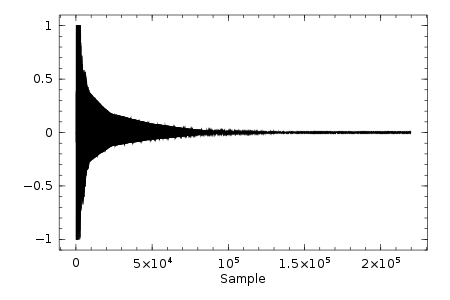

In [49]:
# Plot the signal
plot(s,xlabel="Sample")

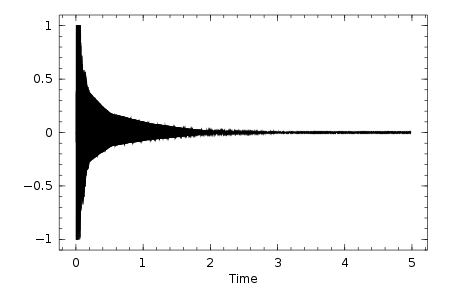

In [51]:
# Plot the signal in time scale
xx=linspace(0,length(s)/Fs,length(s))
plot(xx,s,xlabel="Time")

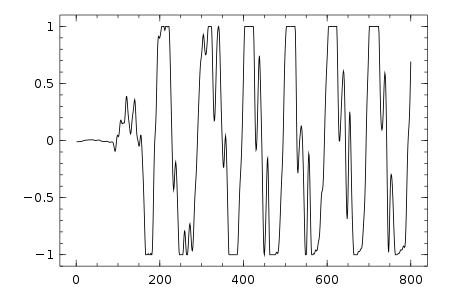

In [53]:
# Detail
plot(s[1:800])

Let us visualize the signal in detail using the approach from the 
[Julia is Fast](../Module A - Short Julia Course/L01b Julia is Fast.ipynb) notebook. 

In [54]:
using Interact

Interact.Slider{Int64}(Signal{Int64}(109001, nactions=0),"k",109001,1:1000:219001,"d",true)


(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


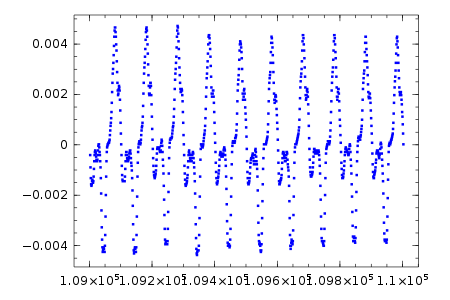

In [56]:
@manipulate for k=1:1000:size(s,1)
    plot(collect(k:k+1000),s[k:k+1000],"b.")
end

In [58]:
# Last part of the signal is just noise, so we read a shorter signal. N must be odd.
sig = wavread("files/piano_A41.wav",100001)

(
[-0.0101321; -0.0102542; … ; -0.00286874; -0.00305185],

44100.0f0,0x0010,Dict{Symbol,Any}(Pair{Symbol,Any}(:fmt,WAV.WAVFormat(0x0001,0x0001,0x0000ac44,0x00015888,0x0002,0x0010,WAV.WAVFormatExtension(0x0000,0x00000000,UInt8[])))))

In [59]:
typeof(sig)

Tuple{Array{Float64,2},Float32,UInt16,Dict{Symbol,Any}}

In [60]:
s=sig[1]

100001×1 Array{Float64,2}:
 -0.0101321  
 -0.0102542  
 -0.0102542  
 -0.0101321  
 -0.00994903 
 -0.00964385 
 -0.00933866 
 -0.00909452 
 -0.00878933 
 -0.00860622 
 -0.00842311 
 -0.00799585 
 -0.00720237 
  ⋮          
  0.00335704 
  0.00317392 
  0.00286874 
  0.00231941 
  0.00152593 
  0.000549333
 -0.000427259
 -0.00134281 
 -0.0021363  
 -0.00262459 
 -0.00286874 
 -0.00305185 

In [61]:
wavplay(s,Fs)

In [62]:
# File to play on Windows
wavwrite(sig[1],"files/piano_A41_short.wav",Fs=sig[2])

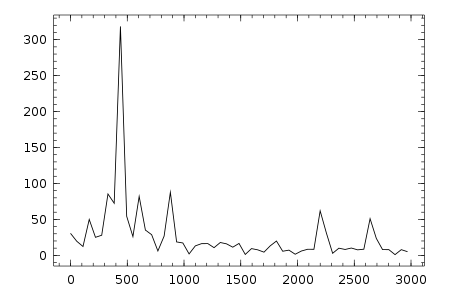

In [63]:
# Check the signal with FFT
Fd=110
N=convert(Int32,ceil(Fs/Fd)) 
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
plot(xx,abs(fft(s[1:800]))[1:nn])

In [64]:
# Form the Hankel matrix
# IMPORTANT - Do not try to display H - it is a 50001 x 50001 matrix.
x=vec(s)
H=Hankel(x);

In [65]:
size(H), H[100,200]

((50001,50001),0.727927488021485)

In [67]:
@time fft(x);

  0.014035 seconds (80 allocations: 3.056 MB)


In [68]:
# We are looking for 20 eigenvalue pairs
n=size(H,1)
f(x)=A_mul_B!(similar(x),H,x)
A=LinearMap(f,n,issymmetric=true)
size(A)

(50001,50001)

In [70]:
@time λ,U=eigs(A, nev=40, which=:LM)

  3.847365 seconds (29.52 k allocations: 1.606 GB, 4.05% gc time)


([1802.91,-1799.5,1297.45,-1296.27,-537.888,537.759,416.906,-415.32,410.179,-410.158  …  -94.8969,94.8306,92.442,-92.3572,81.7541,-81.7477,65.9095,-65.4746,65.3807,-64.407],
[0.0147284 0.00759017 … 0.000934865 -0.0328479; 0.0151816 0.00665314 … -0.00407886 -0.0344853; … ; -0.00178267 0.00111078 … -0.000326988 -4.12385e-5; -0.00171032 0.00122072 … -0.000338463 -6.2934e-5],

40,2,102,[0.120982,-0.0105954,-0.0885805,-0.135127,-0.139385,-0.215806,-0.251161,-0.216566,-0.129307,0.000178836  …  -0.0368823,-0.038495,-0.0416465,-0.045935,-0.0507937,-0.0548305,-0.0562517,-0.0537972,-0.0499203,-0.0468237])

In [71]:
# Count the eigenvalue pairs (+-) larger than the 10% of the maximum
τ=0.1
L=round(Int,(sum(abs(λ).>(τ*maxabs(λ)))/2))

11

At this point, the implementation using full matrices is rather obvious. However, we cannot do that, due to large dimension. Recall, the task is to define Hankel matrices $H_k$ for $k=1,\ldots,L$, from the signal obtained by 
averaging the skew-diagonals of the matrices    
$$
H_k=\lambda_k U_{:,k}U_{:,k}^T + \lambda_{n-k+1} U_{:,n-k+1}U_{:,n-k+1}^T,
$$
_without actually forming the matrices_.

This is a nice programming excercise which can be solved using $\cdot$ products.

In [72]:
function myaverages{T}(λ::T, u::Vector{T})
    n=length(u)
    x=Array(Float64,2*n-1)
    # Average lower diagonals
    for i=1:n
        x[i]=dot(u[1:i],reverse(u[1:i]))/i
    end
    for i=2:n
        x[n+i-1]=dot(u[i:n],reverse(u[i:n]))/(n-i+1)
    end
    λ*x
end

myaverages (generic function with 1 method)

In [73]:
# A small test
u=[1,2,3,4,5]
u*u'

5×5 Array{Int64,2}:
 1   2   3   4   5
 2   4   6   8  10
 3   6   9  12  15
 4   8  12  16  20
 5  10  15  20  25

In [74]:
myaverages(1,u)

9-element Array{Float64,1}:
  1.0    
  2.0    
  3.33333
  5.0    
  7.0    
 11.0    
 15.3333 
 20.0    
 25.0    

We now execute the first step of the algorithm from the above Fact.

Notice that `eigs()` returns the eigenvalues arranged by the absoulte value, so the consecutive 
pairs define the $i$-th signal. The computation of averages is long - it requires $O(n^2)$ 
operations and takes several minutes.

In [75]:
# This step takes 7 minutes, so we skip it

# xcomp=Array(Array{Float64},L)
# for k=1:L
#     xcomp[k]=myaverages(λ[2*k-1],U[:,2*k-1])+myaverages(λ[2*k],U[:,2*k])
# end

__Can we do without averaging?__

The function `myaverages()` is very slow - 7 minutes, compared to 5 seconds for the eigenvalue computation.

The simplest option is to disregard the averages, and use the first column and the last row of the underlying matrix, as in definition of Hankel matrices, which we do next. 
Smarter approach might be to use small random samples 
to compute the averages.

Let us try the simple approach for the fundamental frequency. (See also the notebook [Examples in Signal Decomposition.ipynb](S8%20Examples%20in%20Signal%20Decomposition.ipynb).)

In [76]:
xcomp=Array(Array{Float64},L)
for k=1:L
    k1=2*k-1
    k2=2*k
    xsimple=[(λ[k1]*U[1,k1])*U[:,k1]; (λ[k1]*U[n,k1])*U[2:n,k1]]
    xsimple+=[(λ[k2]*U[1,k2])*U[:,k2]; (λ[k2]*U[n,k2])*U[2:n,k2]]
    xcomp[k]=xsimple
end

Let us look and listen to what we got:

In [77]:
typeof(xcomp[1])

Array{Float64,1}

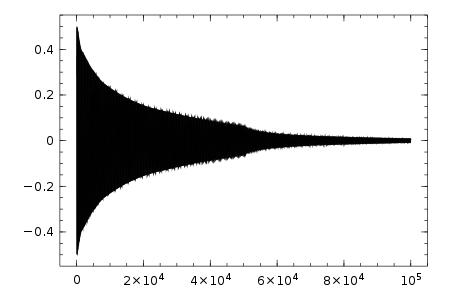

In [78]:
k=1
plot(xcomp[k])

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,"d",true)

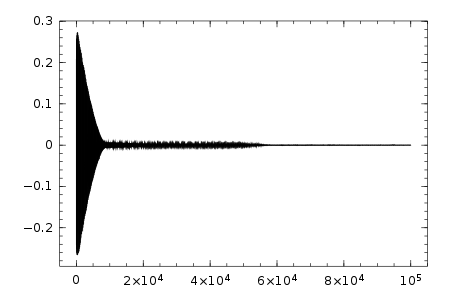

In [79]:
# Entire components
@manipulate for k=1:L
    Winston.plot(xcomp[k])
end

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,"d",true)

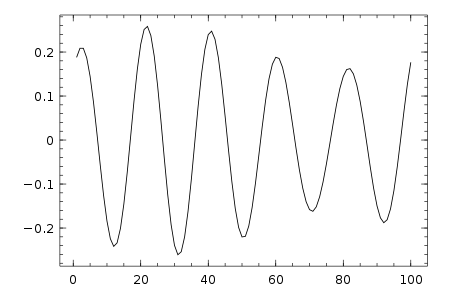

In [80]:
# Short parts of components
@manipulate for k=1:L
    plot(xcomp[k][1:100])
end

Interact.Slider{Int64}(Signal{Int64}(6, nactions=0),"k",6,1:11,"d",true)


(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23460): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


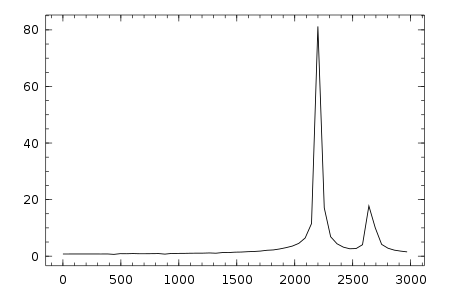

In [81]:
# FFTs of short parts
Fd=110
N=convert(Int32,ceil(Fs/Fd))
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
@manipulate for k=1:L
    plot(xx,abs(fft(xcomp[k][1:800]))[1:nn])
end

We see that all `xcomp[k]` are clean mono-components - see 
[Physics of Music - Notes](http://www.phy.mtu.edu/~suits/notefreqs.html):

```
1 = 440 Hz (A4)
2 = 880 Hz (2*440,+octave,A5)
3 = 1320 Hz (3*440,+quint,E6)
4 = 440 Hz  
5 = 880 Hz
6 = 2200 Hz (5*440,++major terza, C#7) 
7 = 2640 Hz (6*440,++quint,E7)
8 = 440 Hz
9 = 2200 Hz
10 = 1760 Hz (4*440,++octave,A6)
11 = 2640 Hz
```

__N.B.__ Some mono-components are repeated, and they should be grouped by adding components with absolute weighted 
correlation larger than some prescribed threshold. 

In [83]:
# Listen to components - wait between k's
# @manipulate for k in slider(1:L, value=1)
wavplay(xcomp[1],Fs)
# end

In [84]:
wavplay(sum([xcomp[i] for i=1:11]),Fs)

In [86]:
# On Windows, store the mono-components
for i=1:11
    wavwrite(xcomp[i],"files/comp$i.wav",Fs=sig[2])
end

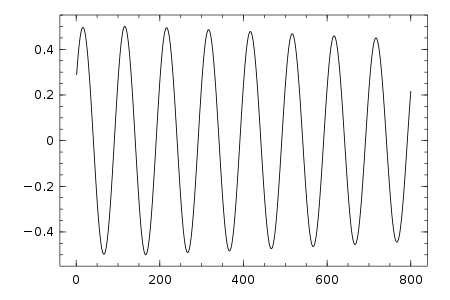

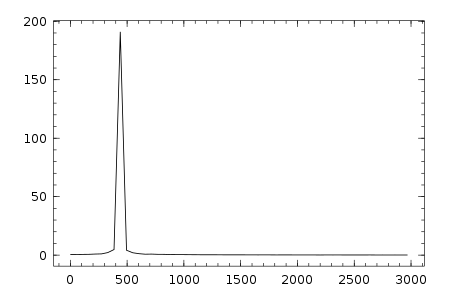

norm(xcomp[1] - xsimple) / norm(xcomp[1]) = 0.0


(nothing,nothing)

In [87]:
p=Array(Any,3)
xsimple=[(λ[1]*U[1,1])*U[:,1]; (λ[1]*U[n,1])*U[2:n,1]]
xsimple+=[(λ[2]*U[1,2])*U[:,2]; (λ[2]*U[n,2])*U[2:n,2]]
p[1]=plot(xsimple[1:800])
p[2]=plot(xx,abs(fft(xsimple[1:800]))[1:nn])
@show norm(xcomp[1]-xsimple)/norm(xcomp[1])
display(p[1]), display(p[2])